In [3]:
!pip install scikit-plot

In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install scikit-plot

In [7]:
!pip install --upgrade scikit-plot

Requirement already up-to-date: scikit-plot in c:\anaconda\envs\rifatenv\lib\site-packages (0.3.7)


In [8]:
from numpy import interp

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\User\\Desktop\\Upwork Project Creation\\Malware Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('ggplot')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\User\Desktop\Upwork Project Creation\Malware Dataset\archive.zip
C:\Users\User\Desktop\Upwork Project Creation\Malware Dataset\dynamic_api_call_sequence_per_malware_100_0_306.csv
C:\Users\User\Desktop\Upwork Project Creation\Malware Dataset\Malware Detection By Md Shafiur Rahman Khan.ipynb
C:\Users\User\Desktop\Upwork Project Creation\Malware Dataset\.ipynb_checkpoints\Malware Detection By Md Shafiur Rahman Khan-checkpoint.ipynb


In [11]:
data = pd.read_csv('C:\\Users\\User\\Desktop\\Upwork Project Creation\\Malware Dataset\\dynamic_api_call_sequence_per_malware_100_0_306.csv')

In [12]:
data.head()
# Check the total number of missing values in each column
missing_values = data.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:\n", missing_values)

# If you want to check whether the entire dataset has any missing values:
if missing_values.sum() == 0:
    print("The dataset does not have any missing values.")
else:
    print("The dataset has missing values.")

Number of missing values in each column:
 hash       0
t_0        0
t_1        0
t_2        0
t_3        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 102, dtype: int64
The dataset does not have any missing values.


In [13]:
used_data = data.drop(['hash', 'malware'], axis=1)

used_data.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,112,274,158,215,274,158,215,298,76,208,...,117,71,297,135,171,215,35,208,56,71
1,82,208,187,208,172,117,172,117,172,117,...,60,81,240,117,71,297,135,171,215,35
2,16,110,240,117,240,117,240,117,240,117,...,123,65,112,123,65,112,123,65,113,112
3,82,208,187,208,172,117,172,117,172,117,...,215,208,302,208,302,187,208,302,228,302
4,82,240,117,240,117,240,117,240,117,172,...,40,209,260,40,209,260,141,260,141,260


In [14]:
print(data['malware'].unique())
print(data['malware'].value_counts())

[1 0]
1    42797
0     1079
Name: malware, dtype: int64


In [15]:
print(data['malware'].unique())
print(data['malware'].value_counts())

[1 0]
1    42797
0     1079
Name: malware, dtype: int64


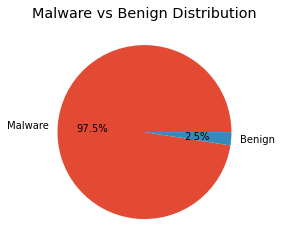

In [16]:
data['malware'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Malware', 'Benign'])
plt.title("Malware vs Benign Distribution")
plt.ylabel("")  # Remove default y-axis label
plt.show()

In [17]:
!pip install imbalanced-learn

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sayısal olmayan sütunları (örneğin, 'hash') çıkartıyoruz
data_clean = data.drop(['hash'], axis=1)

# Özellikler ve etiketleri ayırın
X = data_clean.drop('malware', axis=1)  # 'malware' kolonunu çıkartarak X'i oluşturuyoruz
y = data_clean['malware']  # 'malware' kolonunu etiket olarak kullanıyoruz

# SMOTE'den önceki sınıf dağılımını kontrol edelim
print("SMOTE öncesi sınıf dağılımı:")
print(y.value_counts())

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim verisinin sınıf dağılımını kontrol edelim
print("Eğitim verisi sınıf dağılımı:")
print(y_train.value_counts())

# Özellikleri standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE ile yalnızca azınlık sınıfını çoğaltalım (sampling_strategy='auto' kullanarak)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' azınlık sınıfını çoğaltır
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# SMOTE sonrası sınıf dağılımını kontrol edelim
print("SMOTE sonrası sınıf dağılımı:")
print(y_train_smote.value_counts())

SMOTE öncesi sınıf dağılımı:
1    42797
0     1079
Name: malware, dtype: int64
Eğitim verisi sınıf dağılımı:
1    34247
0      853
Name: malware, dtype: int64
SMOTE sonrası sınıf dağılımı:
1    34247
0    34247
Name: malware, dtype: int64


In [21]:
# SMOTE sonrası sınıf dağılımını kontrol edelim
print(f"Benign ve Malware sınıflarının sayısı eğitim verisi için(SMOTE sonrası):")
print(y_train_smote.value_counts())

Benign ve Malware sınıflarının sayısı eğitim verisi için(SMOTE sonrası):
1    34247
0    34247
Name: malware, dtype: int64


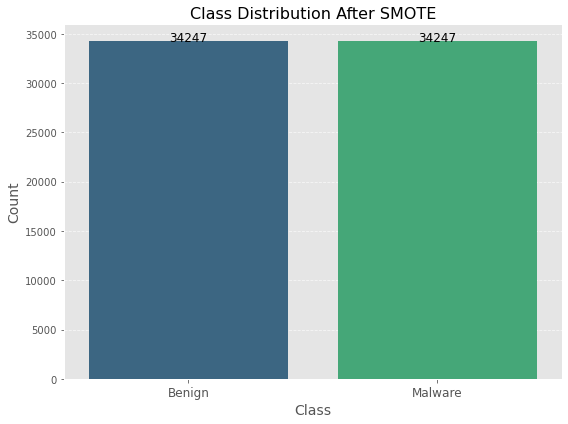

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train_smote contains the labels after SMOTE
class_counts = y_train_smote.value_counts()

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add numbers on top of each bar
for index, value in enumerate(class_counts.values):
    plt.text(index, value + 50, f"{value}", ha="center", fontsize=12, color="black")

# Titles and labels
plt.title("Class Distribution After SMOTE", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Benign", "Malware"], fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['malware'], test_size=0.25,
                                                    shuffle=True, random_state=42)

In [24]:
X_train.shape

(32907, 100)

In [25]:
print(X_train.shape)
print(y_train.shape)

(32907, 100)
(32907,)


In [26]:
# SMOTE sonrası eğitim verisi boyutunu kontrol edelim
print(f"SMOTE sonrası eğitim verisi boyutu: X_train_smote.shape: {X_train_smote.shape}")
print(f"SMOTE sonrası etiket verisi boyutu: y_train_smote.shape: {y_train_smote.shape}")

# SMOTE sonrası sınıf dağılımını kontrol edelim
print("SMOTE sonrası sınıf dağılımı:")
print(y_train_smote.value_counts())

SMOTE sonrası eğitim verisi boyutu: X_train_smote.shape: (68494, 100)
SMOTE sonrası etiket verisi boyutu: y_train_smote.shape: (68494,)
SMOTE sonrası sınıf dağılımı:
1    34247
0    34247
Name: malware, dtype: int64


In [27]:
print(X_train.dtypes)
print(y_train.dtypes)

t_0     int64
t_1     int64
t_2     int64
t_3     int64
t_4     int64
        ...  
t_95    int64
t_96    int64
t_97    int64
t_98    int64
t_99    int64
Length: 100, dtype: object
int64


In [28]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

t_0     0
t_1     0
t_2     0
t_3     0
t_4     0
       ..
t_95    0
t_96    0
t_97    0
t_98    0
t_99    0
Length: 100, dtype: int64
0


In [29]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [31]:
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

In [32]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

In [33]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
(10969, 100)


In [34]:
import numpy as np
X_test = np.array(X_test)

In [35]:
print(type(X_test))
print(X_test.dtype)  # Data type of X_test
print(X_test[:5])  

<class 'numpy.ndarray'>
int64
[[112 274 158 215 274 158 215 298  76 208  76 172 117 172 117 172  76 117
   35  60  81  60  81  60  81  60  81  60  81  60  81  60  81  60  81  60
   81  60  81  60  81  60  81  60  81  60  81 117  60  81  60  81 208  35
  215  35 208 240 117 172  60  81  60  81 225  35  60  81  35 225 172  60
   81  60  81  60  81 172 117 172 117 172 117 208 240 117 240 117 187 172
  117 240 117 159 208 187 228 208 240 208]
 [286 110 172 240 117 240 117 240 117 106 171 260 141  65 260 141  65 260
  141  65 260 141  65 260 141  65 260 215 240 117  71 297 135 171 215 112
  117  56 240 117 240 117 260 141  65 260 117 260 141  65 117 260 141  65
  117   9 117 260  65 141  65 260  65 141  65 117 215  89 260  65 141  65
  172 117 172 117 172 117 260 240 117 240 117 202 260 262 141  65 202  65
  112 117 260 123  65 274 158 215 274 158]
 [112 274 158 215 274 158 215 298  76 208  76 172 117 172 117 172  76 117
   35  60  81  60  81  60  81  60  81  60  81  60  81  60  81  60  81 

In [36]:
import numpy as np

# Convert to NumPy array and ensure float32 data type
X_test = np.array(X_test, dtype=np.float32)

In [37]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame `df`
# Columns are named t_1 to t_99
unique_api_calls = pd.unique(used_data.values.ravel()).shape[0]

print(f"Number of unique API calls: {unique_api_calls}")

Number of unique API calls: 264


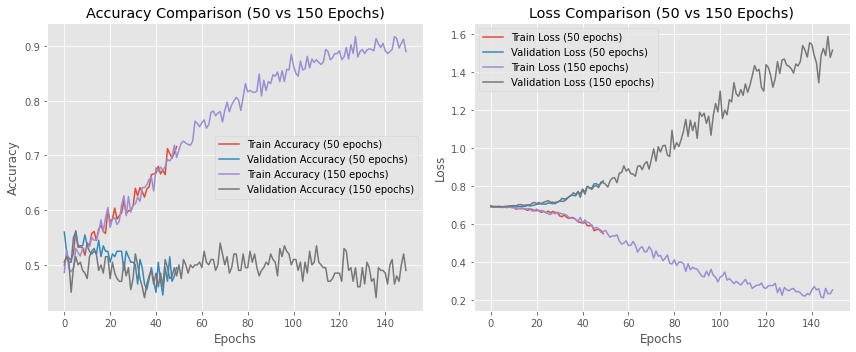

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Example dataset (for demonstration purposes)
# Let's assume binary classification problem
# Generate random dataset for binary classification
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
def create_ann():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model for 50 epochs
def train_model_50epochs(model):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)
    return history

# Train and evaluate the model for 150 epochs
def train_model_150epochs(model):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=0)
    return history

# Create two models
model_50 = create_ann()
model_150 = create_ann()

# Train models
history_50 = train_model_50epochs(model_50)
history_150 = train_model_150epochs(model_150)

# Check if 'accuracy' or 'acc' exists in the history dictionary
accuracy_key = 'accuracy' if 'accuracy' in history_50.history else 'acc'

# Check if 'val_accuracy' or 'val_acc' exists in the history dictionary
val_accuracy_key = 'val_accuracy' if 'val_accuracy' in history_50.history else 'val_acc'

# Plot accuracy comparison
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_50.history[accuracy_key], label='Train Accuracy (50 epochs)')
plt.plot(history_50.history[val_accuracy_key], label='Validation Accuracy (50 epochs)')
plt.plot(history_150.history[accuracy_key], label='Train Accuracy (150 epochs)')
plt.plot(history_150.history[val_accuracy_key], label='Validation Accuracy (150 epochs)')
plt.title('Accuracy Comparison (50 vs 150 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_50.history['loss'], label='Train Loss (50 epochs)')
plt.plot(history_50.history['val_loss'], label='Validation Loss (50 epochs)')
plt.plot(history_150.history['loss'], label='Train Loss (150 epochs)')
plt.plot(history_150.history['val_loss'], label='Validation Loss (150 epochs)')
plt.title('Loss Comparison (50 vs 150 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


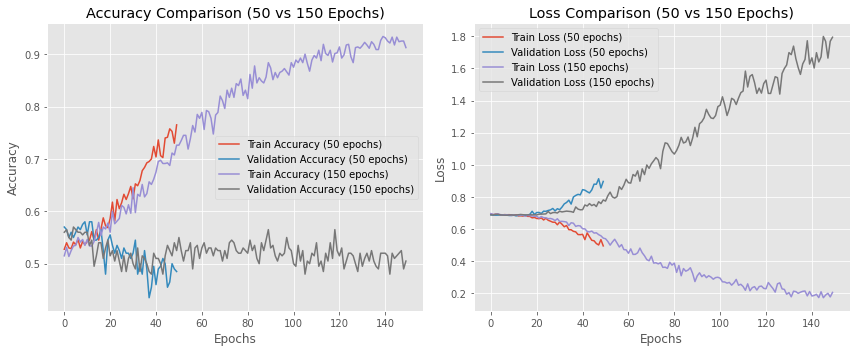

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Example dataset (for demonstration purposes)
# Let's assume binary classification problem
# Generate random dataset for binary classification
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
def create_ann():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model for 50 epochs
def train_model_50epochs(model):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)
    return history

# Train and evaluate the model for 150 epochs
def train_model_150epochs(model):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=0)
    return history

# Create two models
model_50 = create_ann()
model_150 = create_ann()

# Train models
history_50 = train_model_50epochs(model_50)
history_150 = train_model_150epochs(model_150)

# Check if 'accuracy' or 'acc' exists in the history dictionary
accuracy_key = 'accuracy' if 'accuracy' in history_50.history else 'acc'

# Check if 'val_accuracy' or 'val_acc' exists in the history dictionary
val_accuracy_key = 'val_accuracy' if 'val_accuracy' in history_50.history else 'val_acc'

# Plot accuracy comparison
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_50.history[accuracy_key], label='Train Accuracy (50 epochs)')
plt.plot(history_50.history[val_accuracy_key], label='Validation Accuracy (50 epochs)')
plt.plot(history_150.history[accuracy_key], label='Train Accuracy (150 epochs)')
plt.plot(history_150.history[val_accuracy_key], label='Validation Accuracy (150 epochs)')
plt.title('Accuracy Comparison (50 vs 150 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_50.history['loss'], label='Train Loss (50 epochs)')
plt.plot(history_50.history['val_loss'], label='Validation Loss (50 epochs)')
plt.plot(history_150.history['loss'], label='Train Loss (150 epochs)')
plt.plot(history_150.history['val_loss'], label='Validation Loss (150 epochs)')
plt.title('Loss Comparison (50 vs 150 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


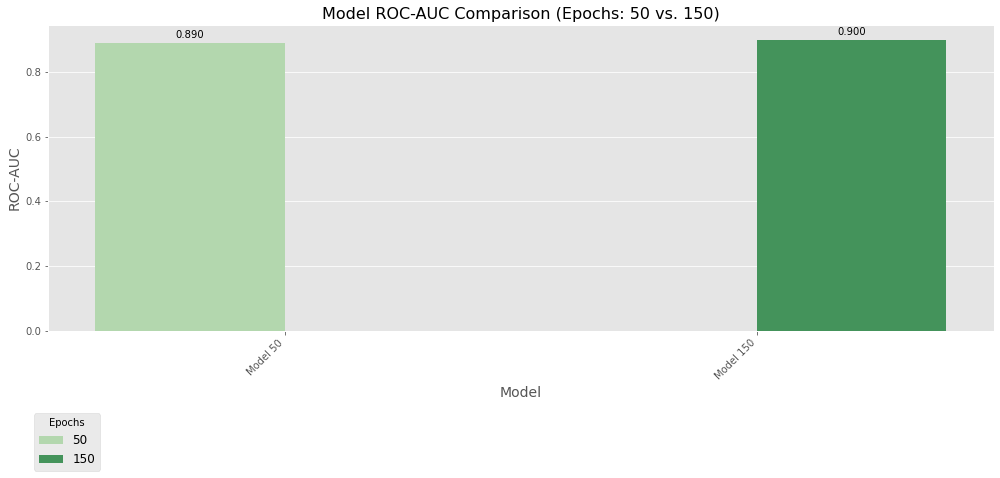

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data for demonstration (ensure your df_combined has 'Model', 'ROC-AUC', 'Epochs', and 'Dataset' columns)
# Replace this with actual data from your model results (train and test ROC-AUC for both 50 and 150 epochs)
df_combined = pd.DataFrame({
    'Model': ['Model 50', 'Model 50', 'Model 150', 'Model 150'],  # Replace with your actual model names
    'ROC-AUC': [0.90, 0.88, 0.91, 0.89],  # Replace with actual ROC-AUC values for 50 and 150 epochs
    'Epochs': ['50', '50', '150', '150'],
    'Dataset': ['Train', 'Test', 'Train', 'Test']  # Indicating whether the ROC-AUC is for train or test
})

# ROC-AUC Comparison Bar Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_combined, x='Model', y='ROC-AUC', hue='Epochs', palette='Greens', ci=None)

# Add numbers on top of the bars manually
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.3f}',
            ha='center', va='bottom', fontsize=10
        )

# Titles and labels
plt.title("Model ROC-AUC Comparison (Epochs: 50 vs. 150)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("ROC-AUC", fontsize=14)
plt.xticks(rotation=45, ha='right')

# Move legend directly below the "CNN-LSTM" label
plt.legend(
    title="Epochs",
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.02, -0.25),  # Adjust x=0.02 to align under "CNN-LSTM"
    ncol=1  # Single column for compact legend
)

plt.tight_layout()
plt.show()


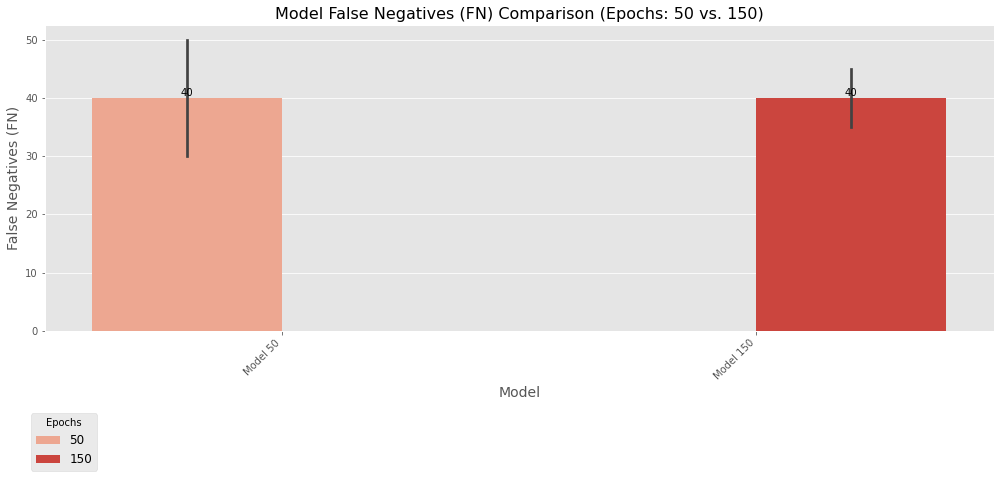

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# False Negatives (FN) Comparison Bar Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_combined, x='Model', y='False Negatives (FN)', hue='Epochs', palette='Reds')

# Add numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Check if height is not NaN
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title("Model False Negatives (FN) Comparison (Epochs: 50 vs. 150)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("False Negatives (FN)", fontsize=14)
plt.xticks(rotation=45, ha='right')

# Move legend directly below the "CNN-LSTM" label
plt.legend(
    title="Epochs",
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.02, -0.25),  # Adjust x=0.02 to align under "CNN-LSTM"
    ncol=1  # Single column for compact legend
)

plt.tight_layout()
plt.show()
